# Diagnostic minitest (all questions)

Here the algorithm to show that the results in the minitest are within the range of the expected.

C:\Users\pablo\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


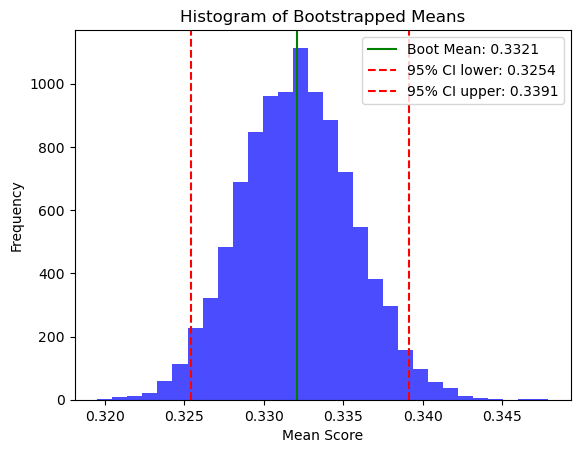

Shapiro-Wilk test statistic: 0.9994
Shapiro-Wilk p-value: 0.0015
The bootstrapped means do not follow a normal distribution (p < 0.05).

Kolmogorov-Smirnov test statistic: 0.0094
Kolmogorov-Smirnov p-value: 0.3377
The bootstrapped means follow a normal distribution (p >= 0.05).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro, kstest

# Load CSV files
prob_df = pd.read_csv('DiagnosticProbabilities_8q.csv', index_col=0)
results_df = pd.read_csv('DiagnosticResults_36s_8q.csv', index_col=0)

# Question values
values = np.array([0.110, 0.106, 0.095, 0.174, 0.114, 0.108, 0.096, 0.196])

# Calculate the expected score for each student
expected_scores = (prob_df * values).sum(axis=1)

# Bootstrap the mean of expected scores
bootstrap_means = []
n_iterations = 10000
for _ in range(n_iterations):
    sample = np.random.choice(expected_scores, size=len(expected_scores), replace=True)
    bootstrap_means.append(sample.mean())

bootstrap_means = np.array(bootstrap_means)

# Shapiro-Wilk test for normality of bootstrapped means
shapiro_stat, shapiro_p = shapiro(bootstrap_means)

# Kolmogorov-Smirnov test for normality of bootstrapped means
ks_stat, ks_p = kstest(bootstrap_means, 'norm', args=(bootstrap_means.mean(), bootstrap_means.std()))

# Plot the histogram of bootstrapped means
plt.hist(bootstrap_means, bins=30, color='blue', alpha=0.7)
plt.axvline(bootstrap_means.mean(), color='green', linestyle='-', label=f'Boot Mean: {bootstrap_means.mean():.4f}')
plt.axvline(np.percentile(bootstrap_means, 2.5), color='red', linestyle='--', label=f'95% CI lower: {np.percentile(bootstrap_means, 2.5):.4f}')
plt.axvline(np.percentile(bootstrap_means, 97.5), color='red', linestyle='--', label=f'95% CI upper: {np.percentile(bootstrap_means, 97.5):.4f}')
plt.legend()
plt.title('Histogram of Bootstrapped Means')
plt.xlabel('Mean Score')
plt.ylabel('Frequency')
plt.show()

# Print test results
print(f"Shapiro-Wilk test statistic: {shapiro_stat:.4f}")
print(f"Shapiro-Wilk p-value: {shapiro_p:.4f}")
if shapiro_p < 0.05:
    print("The bootstrapped means do not follow a normal distribution (p < 0.05).")
else:
    print("The bootstrapped means follow a normal distribution (p >= 0.05).")

print(f"\nKolmogorov-Smirnov test statistic: {ks_stat:.4f}")
print(f"Kolmogorov-Smirnov p-value: {ks_p:.4f}")
if ks_p < 0.05:
    print("The bootstrapped means do not follow a normal distribution (p < 0.05).")
else:
    print("The bootstrapped means follow a normal distribution (p >= 0.05).")


# Diagnostic test: Bootstrapping to prove that CLT applies
Comparing without assuming normality.

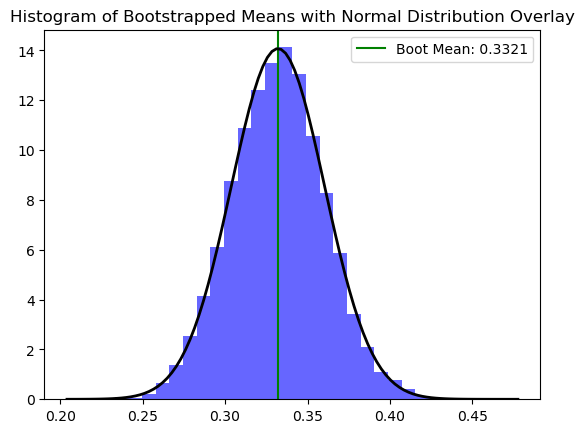

KS test statistic: 0.0050
KS p-value: 0.9657
Shapiro-Wilk test statistic: 0.9997
Shapiro-Wilk p-value: 0.0697
Anderson-Darling test statistic: 0.4319
Critical values for Anderson-Darling: [0.576 0.656 0.787 0.918 1.092]
Significance levels for Anderson-Darling: [15.  10.   5.   2.5  1. ]
D'Agostino-Pearson test statistic: 3.6320
D'Agostino-Pearson p-value: 0.1627
The distribution of bootstrapped means is consistent with normality according to the KS test (p >= 0.05).
The distribution of bootstrapped means is consistent with normality according to the Shapiro-Wilk test (p >= 0.05).
The distribution of bootstrapped means is consistent with normality according to the D'Agostino-Pearson test (p >= 0.05).
The distribution of bootstrapped means is consistent with normality according to the Anderson-Darling test (significance level >= 0.05).


C:\Users\pablo\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest, shapiro, anderson, normaltest

# Load the probability and result datasets
prob_df = pd.read_csv('DiagnosticProbabilities_8q.csv', index_col=0)
results_df = pd.read_csv('DiagnosticResults_36s_8q.csv', index_col=0)

# Question values
#values = np.array([1, 1, 1, 1, 1, 1, 1, 1])  # Set each question value to 1 for simplicity
values = np.array([0.110, 0.106, 0.095, 0.174, 0.114, 0.108, 0.096, 0.196])

# Number of bootstraps
num_bootstraps = 10000
bootstrap_means = []

# Perform bootstrapping using correctness probabilities
for _ in range(num_bootstraps):
    simulated_scores = []
    for student in prob_df.index:
        # Simulate answers for each student based on their probabilities
        simulated_answers = np.random.binomial(1, prob_df.loc[student].values)
        # Calculate total score for this simulated test
        simulated_score = np.sum(simulated_answers * values)
        simulated_scores.append(simulated_score)

    # Calculate mean of simulated scores and store it
    bootstrap_means.append(np.mean(simulated_scores))

bootstrap_means = np.array(bootstrap_means)

# Plot the distribution of the bootstrapped means
plt.hist(bootstrap_means, bins=30, alpha=0.6, color='b', density=True)
plt.axvline(x=np.mean(bootstrap_means), color='g', linestyle='-', label=f'Boot Mean: {np.mean(bootstrap_means):.4f}')

# Overlay the normal distribution for visual comparison
mean = np.mean(bootstrap_means)
std_dev = np.std(bootstrap_means)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Histogram of Bootstrapped Means with Normal Distribution Overlay')
plt.legend()
plt.show()

# Kolmogorov-Smirnov test to check normality
ks_statistic, ks_p_value = kstest(bootstrap_means, 'norm', args=(mean, std_dev))
print(f"KS test statistic: {ks_statistic:.4f}")
print(f"KS p-value: {ks_p_value:.4f}")

# Shapiro-Wilk test to check normality
shapiro_stat, shapiro_p_value = shapiro(bootstrap_means)
print(f"Shapiro-Wilk test statistic: {shapiro_stat:.4f}")
print(f"Shapiro-Wilk p-value: {shapiro_p_value:.4f}")

# Anderson-Darling test to check normality
anderson_result = anderson(bootstrap_means)
print(f"Anderson-Darling test statistic: {anderson_result.statistic:.4f}")
print(f"Critical values for Anderson-Darling: {anderson_result.critical_values}")
print(f"Significance levels for Anderson-Darling: {anderson_result.significance_level}")

# D'Agostino-Pearson test to check normality
dagostino_stat, dagostino_p_value = normaltest(bootstrap_means)
print(f"D'Agostino-Pearson test statistic: {dagostino_stat:.4f}")
print(f"D'Agostino-Pearson p-value: {dagostino_p_value:.4f}")

# Conclusion
if ks_p_value >= 0.05:
    print("The distribution of bootstrapped means is consistent with normality according to the KS test (p >= 0.05).")
else:
    print("The distribution of bootstrapped means is not consistent with normality according to the KS test (p < 0.05).")

if shapiro_p_value >= 0.05:
    print("The distribution of bootstrapped means is consistent with normality according to the Shapiro-Wilk test (p >= 0.05).")
else:
    print("The distribution of bootstrapped means is not consistent with normality according to the Shapiro-Wilk test (p < 0.05).")

if dagostino_p_value >= 0.05:
    print("The distribution of bootstrapped means is consistent with normality according to the D'Agostino-Pearson test (p >= 0.05).")
else:
    print("The distribution of bootstrapped means is not consistent with normality according to the D'Agostino-Pearson test (p < 0.05).")

# Evaluate the Anderson-Darling test for normality
significance = anderson_result.significance_level[anderson_result.critical_values <= anderson_result.statistic]
if len(significance) > 0:
    print("The distribution of bootstrapped means is not consistent with normality according to the Anderson-Darling test (significance level < 0.05).")
else:
    print("The distribution of bootstrapped means is consistent with normality according to the Anderson-Darling test (significance level >= 0.05).")


# Preliminary test: Bootstrapping to prove that CLT applies
Comparing without assuming normality.

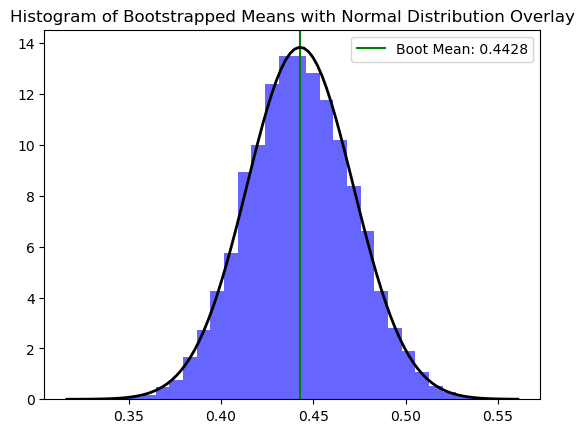

KS test statistic: 0.0080
KS p-value: 0.5425
Shapiro-Wilk test statistic: 0.9997
Shapiro-Wilk p-value: 0.1719
Anderson-Darling test statistic: 0.8424
Critical values for Anderson-Darling: [0.576 0.656 0.787 0.918 1.092]
Significance levels for Anderson-Darling: [15.  10.   5.   2.5  1. ]
D'Agostino-Pearson test statistic: 4.0287
D'Agostino-Pearson p-value: 0.1334
The distribution of bootstrapped means is consistent with normality according to the KS test (p >= 0.05).
The distribution of bootstrapped means is consistent with normality according to the Shapiro-Wilk test (p >= 0.05).
The distribution of bootstrapped means is consistent with normality according to the D'Agostino-Pearson test (p >= 0.05).
The distribution of bootstrapped means is not consistent with normality according to the Anderson-Darling test (significance level < 0.05).


C:\Users\pablo\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest, shapiro, anderson, normaltest

# Load the probability and result datasets
prob_df = pd.read_csv('PreliminaryProbabilities_8q.csv', index_col=0)
results_df = pd.read_csv('PreliminaryResults_8q.csv', index_col=0)

# Question values
#values = np.array([1, 1, 1, 1, 1, 1, 1, 1])  # Set each question value to 1 for simplicity
values = np.array([0.110, 0.106, 0.095, 0.174, 0.114, 0.108, 0.096, 0.196])

# Number of bootstraps
num_bootstraps = 10000
bootstrap_means = []

# Perform bootstrapping using correctness probabilities
for _ in range(num_bootstraps):
    simulated_scores = []
    for student in prob_df.index:
        # Simulate answers for each student based on their probabilities
        simulated_answers = np.random.binomial(1, prob_df.loc[student].values)
        # Calculate total score for this simulated test
        simulated_score = np.sum(simulated_answers * values)
        simulated_scores.append(simulated_score)

    # Calculate mean of simulated scores and store it
    bootstrap_means.append(np.mean(simulated_scores))

bootstrap_means = np.array(bootstrap_means)

# Plot the distribution of the bootstrapped means
plt.hist(bootstrap_means, bins=30, alpha=0.6, color='b', density=True)
plt.axvline(x=np.mean(bootstrap_means), color='g', linestyle='-', label=f'Boot Mean: {np.mean(bootstrap_means):.4f}')

# Overlay the normal distribution for visual comparison
mean = np.mean(bootstrap_means)
std_dev = np.std(bootstrap_means)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Histogram of Bootstrapped Means with Normal Distribution Overlay')
plt.legend()
plt.show()

# Kolmogorov-Smirnov test to check normality
ks_statistic, ks_p_value = kstest(bootstrap_means, 'norm', args=(mean, std_dev))
print(f"KS test statistic: {ks_statistic:.4f}")
print(f"KS p-value: {ks_p_value:.4f}")

# Shapiro-Wilk test to check normality
shapiro_stat, shapiro_p_value = shapiro(bootstrap_means)
print(f"Shapiro-Wilk test statistic: {shapiro_stat:.4f}")
print(f"Shapiro-Wilk p-value: {shapiro_p_value:.4f}")

# Anderson-Darling test to check normality
anderson_result = anderson(bootstrap_means)
print(f"Anderson-Darling test statistic: {anderson_result.statistic:.4f}")
print(f"Critical values for Anderson-Darling: {anderson_result.critical_values}")
print(f"Significance levels for Anderson-Darling: {anderson_result.significance_level}")

# D'Agostino-Pearson test to check normality
dagostino_stat, dagostino_p_value = normaltest(bootstrap_means)
print(f"D'Agostino-Pearson test statistic: {dagostino_stat:.4f}")
print(f"D'Agostino-Pearson p-value: {dagostino_p_value:.4f}")

# Conclusion
if ks_p_value >= 0.05:
    print("The distribution of bootstrapped means is consistent with normality according to the KS test (p >= 0.05).")
else:
    print("The distribution of bootstrapped means is not consistent with normality according to the KS test (p < 0.05).")

if shapiro_p_value >= 0.05:
    print("The distribution of bootstrapped means is consistent with normality according to the Shapiro-Wilk test (p >= 0.05).")
else:
    print("The distribution of bootstrapped means is not consistent with normality according to the Shapiro-Wilk test (p < 0.05).")

if dagostino_p_value >= 0.05:
    print("The distribution of bootstrapped means is consistent with normality according to the D'Agostino-Pearson test (p >= 0.05).")
else:
    print("The distribution of bootstrapped means is not consistent with normality according to the D'Agostino-Pearson test (p < 0.05).")

# Evaluate the Anderson-Darling test for normality
significance = anderson_result.significance_level[anderson_result.critical_values <= anderson_result.statistic]
if len(significance) > 0:
    print("The distribution of bootstrapped means is not consistent with normality according to the Anderson-Darling test (significance level < 0.05).")
else:
    print("The distribution of bootstrapped means is consistent with normality according to the Anderson-Darling test (significance level >= 0.05).")


# Preliminary test: Bootstrapping to prove that CLT applies
Comparing without assuming normality.

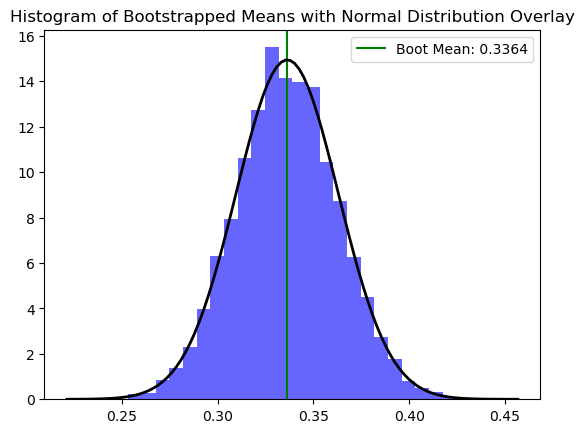

KS test statistic: 0.0099
KS p-value: 0.2788
Shapiro-Wilk test statistic: 0.9998
Shapiro-Wilk p-value: 0.5449
Anderson-Darling test statistic: 0.4541
Critical values for Anderson-Darling: [0.576 0.656 0.787 0.918 1.092]
Significance levels for Anderson-Darling: [15.  10.   5.   2.5  1. ]
D'Agostino-Pearson test statistic: 3.5428
D'Agostino-Pearson p-value: 0.1701
The distribution of bootstrapped means is consistent with normality according to the KS test (p >= 0.05).
The distribution of bootstrapped means is consistent with normality according to the Shapiro-Wilk test (p >= 0.05).
The distribution of bootstrapped means is consistent with normality according to the D'Agostino-Pearson test (p >= 0.05).
The distribution of bootstrapped means is consistent with normality according to the Anderson-Darling test (significance level >= 0.05).


C:\Users\pablo\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest, shapiro, anderson, normaltest

# Load the probability and result datasets, dropping columns for questions 3 and 7
# Correct way to drop columns by their index positions immediately after reading the CSV file


# Load CSV files
prob_df = pd.read_csv('PreliminaryProbabilities_8q.csv', index_col=0)
results_df = pd.read_csv('FinalResults_8q.csv', index_col=0)

# Question values, excluding questions 3 and 7 (indexes 2 and 6)
values = np.array([0.110, 0.106, 0.174, 0.114, 0.108, 0.196])  # Excluding Q3 and Q7

# Drop columns for questions 3 and 7 (indexes 2 and 6)
prob_subset = prob_df.drop(columns=[prob_df.columns[2], prob_df.columns[6]])
results_subset = results_df.drop(columns=[results_df.columns[2], results_df.columns[6]])


# Number of bootstraps
num_bootstraps = 10000
bootstrap_means = []

# Perform bootstrapping using correctness probabilities for 6 questions
for _ in range(num_bootstraps):
    simulated_scores = []
    for student in prob_subset.index:
        # Simulate answers for each student based on their probabilities
        simulated_answers = np.random.binomial(1, prob_subset.loc[student].values)
        # Calculate total score for this simulated test
        simulated_score = np.sum(simulated_answers * values)
        simulated_scores.append(simulated_score)

    # Calculate mean of simulated scores and store it
    bootstrap_means.append(np.mean(simulated_scores))

bootstrap_means = np.array(bootstrap_means)

# Plot the distribution of the bootstrapped means
plt.hist(bootstrap_means, bins=30, alpha=0.6, color='b', density=True)
plt.axvline(x=np.mean(bootstrap_means), color='g', linestyle='-', label=f'Boot Mean: {np.mean(bootstrap_means):.4f}')

# Overlay the normal distribution for visual comparison
mean = np.mean(bootstrap_means)
std_dev = np.std(bootstrap_means)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Histogram of Bootstrapped Means with Normal Distribution Overlay')
plt.legend()
plt.show()

# Kolmogorov-Smirnov test to check normality
ks_statistic, ks_p_value = kstest(bootstrap_means, 'norm', args=(mean, std_dev))
print(f"KS test statistic: {ks_statistic:.4f}")
print(f"KS p-value: {ks_p_value:.4f}")

# Shapiro-Wilk test to check normality
shapiro_stat, shapiro_p_value = shapiro(bootstrap_means)
print(f"Shapiro-Wilk test statistic: {shapiro_stat:.4f}")
print(f"Shapiro-Wilk p-value: {shapiro_p_value:.4f}")

# Anderson-Darling test to check normality
anderson_result = anderson(bootstrap_means)
print(f"Anderson-Darling test statistic: {anderson_result.statistic:.4f}")
print(f"Critical values for Anderson-Darling: {anderson_result.critical_values}")
print(f"Significance levels for Anderson-Darling: {anderson_result.significance_level}")

# D'Agostino-Pearson test to check normality
dagostino_stat, dagostino_p_value = normaltest(bootstrap_means)
print(f"D'Agostino-Pearson test statistic: {dagostino_stat:.4f}")
print(f"D'Agostino-Pearson p-value: {dagostino_p_value:.4f}")

# Conclusion
if ks_p_value >= 0.05:
    print("The distribution of bootstrapped means is consistent with normality according to the KS test (p >= 0.05).")
else:
    print("The distribution of bootstrapped means is not consistent with normality according to the KS test (p < 0.05).")

if shapiro_p_value >= 0.05:
    print("The distribution of bootstrapped means is consistent with normality according to the Shapiro-Wilk test (p >= 0.05).")
else:
    print("The distribution of bootstrapped means is not consistent with normality according to the Shapiro-Wilk test (p < 0.05).")

if dagostino_p_value >= 0.05:
    print("The distribution of bootstrapped means is consistent with normality according to the D'Agostino-Pearson test (p >= 0.05).")
else:
    print("The distribution of bootstrapped means is not consistent with normality according to the D'Agostino-Pearson test (p < 0.05).")

# Evaluate the Anderson-Darling test for normality
significance = anderson_result.significance_level[anderson_result.critical_values <= anderson_result.statistic]
if len(significance) > 0:
    print("The distribution of bootstrapped means is not consistent with normality according to the Anderson-Darling test (significance level < 0.05).")
else:
    print("The distribution of bootstrapped means is consistent with normality according to the Anderson-Darling test (significance level >= 0.05).")


# Preliminary test (only Q3 & Q7): Bootstrapping to prove that CLT does NOT apply

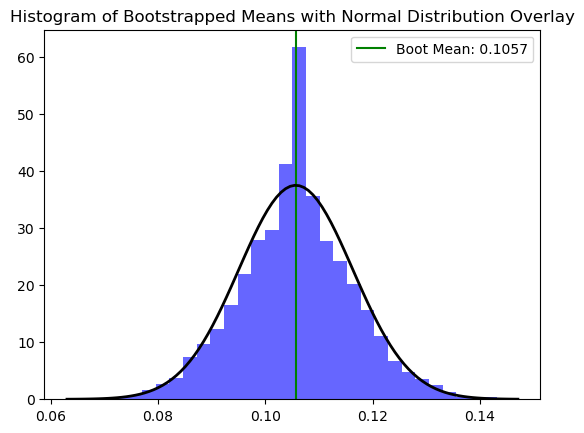

KS test statistic: 0.0453
KS p-value: 0.0000
Shapiro-Wilk test statistic: 0.9962
Shapiro-Wilk p-value: 0.0000
Anderson-Darling test statistic: 8.6780
Critical values for Anderson-Darling: [0.576 0.655 0.786 0.917 1.091]
Significance levels for Anderson-Darling: [15.  10.   5.   2.5  1. ]
D'Agostino-Pearson test statistic: 0.2141
D'Agostino-Pearson p-value: 0.8985
The distribution of bootstrapped means is not consistent with normality according to the KS test (p < 0.05).
The distribution of bootstrapped means is not consistent with normality according to the Shapiro-Wilk test (p < 0.05).
The distribution of bootstrapped means is consistent with normality according to the D'Agostino-Pearson test (p >= 0.05).
The distribution of bootstrapped means is not consistent with normality according to the Anderson-Darling test (significance level < 0.05).


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest, shapiro, anderson, normaltest

# Load the probability and result datasets, dropping columns for questions 3 and 7
# Correct way to drop columns by their index positions immediately after reading the CSV file


# Load CSV files
prob_df = pd.read_csv('PreliminaryProbabilities_8q.csv', index_col=0)
results_df = pd.read_csv('FinalResults_8q.csv', index_col=0)

# Question values, only questions 3 and 7 (indexes 2 and 6)
values = np.array([0.095, 0.096])  # Only Q3 and Q7

# Drop columns except for questions 3 and 7 (indexes 2 and 6)
prob_subset = prob_df.drop(columns=[prob_df.columns[0], prob_df.columns[1], prob_df.columns[3], prob_df.columns[4], prob_df.columns[5], prob_df.columns[7], ])
results_subset = results_df.drop(columns=[results_df.columns[0], results_df.columns[1], results_df.columns[3], results_df.columns[4], results_df.columns[5], results_df.columns[7]])

# Number of bootstraps
num_bootstraps = 10000
bootstrap_means = []

# Perform bootstrapping using correctness probabilities for 6 questions
for _ in range(num_bootstraps):
    simulated_scores = []
    for student in prob_subset.index:
        # Simulate answers for each student based on their probabilities
        simulated_answers = np.random.binomial(1, prob_subset.loc[student].values)
        # Calculate total score for this simulated test
        simulated_score = np.sum(simulated_answers * values)
        simulated_scores.append(simulated_score)

    # Calculate mean of simulated scores and store it
    bootstrap_means.append(np.mean(simulated_scores))

bootstrap_means = np.array(bootstrap_means)

# Plot the distribution of the bootstrapped means
plt.hist(bootstrap_means, bins=30, alpha=0.6, color='b', density=True)
plt.axvline(x=np.mean(bootstrap_means), color='g', linestyle='-', label=f'Boot Mean: {np.mean(bootstrap_means):.4f}')

# Overlay the normal distribution for visual comparison
mean = np.mean(bootstrap_means)
std_dev = np.std(bootstrap_means)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Histogram of Bootstrapped Means with Normal Distribution Overlay')
plt.legend()
plt.show()

# Kolmogorov-Smirnov test to check normality
ks_statistic, ks_p_value = kstest(bootstrap_means, 'norm', args=(mean, std_dev))
print(f"KS test statistic: {ks_statistic:.4f}")
print(f"KS p-value: {ks_p_value:.4f}")

# Shapiro-Wilk test to check normality
shapiro_stat, shapiro_p_value = shapiro(bootstrap_means)
print(f"Shapiro-Wilk test statistic: {shapiro_stat:.4f}")
print(f"Shapiro-Wilk p-value: {shapiro_p_value:.4f}")

# Anderson-Darling test to check normality
anderson_result = anderson(bootstrap_means)
print(f"Anderson-Darling test statistic: {anderson_result.statistic:.4f}")
print(f"Critical values for Anderson-Darling: {anderson_result.critical_values}")
print(f"Significance levels for Anderson-Darling: {anderson_result.significance_level}")

# D'Agostino-Pearson test to check normality
dagostino_stat, dagostino_p_value = normaltest(bootstrap_means)
print(f"D'Agostino-Pearson test statistic: {dagostino_stat:.4f}")
print(f"D'Agostino-Pearson p-value: {dagostino_p_value:.4f}")

# Conclusion
if ks_p_value >= 0.05:
    print("The distribution of bootstrapped means is consistent with normality according to the KS test (p >= 0.05).")
else:
    print("The distribution of bootstrapped means is not consistent with normality according to the KS test (p < 0.05).")

if shapiro_p_value >= 0.05:
    print("The distribution of bootstrapped means is consistent with normality according to the Shapiro-Wilk test (p >= 0.05).")
else:
    print("The distribution of bootstrapped means is not consistent with normality according to the Shapiro-Wilk test (p < 0.05).")

if dagostino_p_value >= 0.05:
    print("The distribution of bootstrapped means is consistent with normality according to the D'Agostino-Pearson test (p >= 0.05).")
else:
    print("The distribution of bootstrapped means is not consistent with normality according to the D'Agostino-Pearson test (p < 0.05).")

# Evaluate the Anderson-Darling test for normality
significance = anderson_result.significance_level[anderson_result.critical_values <= anderson_result.statistic]
if len(significance) > 0:
    print("The distribution of bootstrapped means is not consistent with normality according to the Anderson-Darling test (significance level < 0.05).")
else:
    print("The distribution of bootstrapped means is consistent with normality according to the Anderson-Darling test (significance level >= 0.05).")
